In [94]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import v_measure_score
from sklearn import preprocessing 
import plotly.express as px
from sklearn import metrics
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster
from sklearn.cluster import SpectralClustering

from sklearn.decomposition import PCA

In [64]:
# Import Dataset
df=pd.read_csv('Mall_Customers.csv')

In [65]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [66]:
df.rename(columns={'Spending Score (1-100)':'Score', 'Annual Income (k$)':'Income'}, inplace=True)

In [67]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
 1   Age     200 non-null    int64 
 2   Income  200 non-null    int64 
 3   Score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


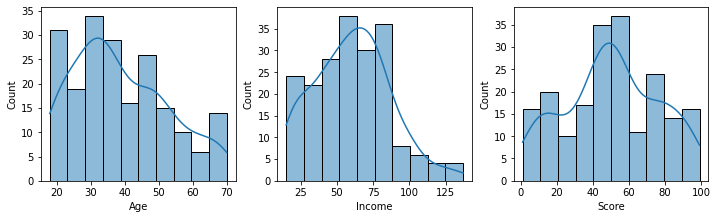

In [69]:
# Distribution and Boxplot of BMI
fig, ax = plt.subplots(1,3)
fig.set_size_inches(10, 3)
plt.tight_layout()
sns.histplot(data=df, x='Age', kde=True, bins=10, ax=ax[0], alpha=0.5);
sns.histplot(data=df, x='Income', kde=True, bins=10, ax=ax[1], alpha=0.5);
sns.histplot(data=df, x='Score', kde=True, bins=10, ax=ax[2], alpha=0.5);
#sns.boxplot(data=df, y='bmi', x='stroke', ax=ax[1]);

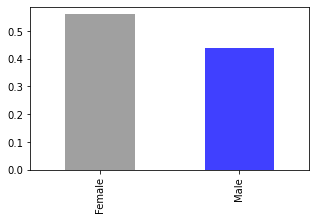

In [70]:
# Check the Gender Ratio
df.Gender.value_counts(normalize=True).plot(kind='bar',color=["gray","Blue"], alpha=0.75, figsize=(5,3));

##### Observations:
    Records contains a balance sex ratio

In [71]:
df_dummy=pd.get_dummies(df['Gender'])
dfR=pd.concat([df, df_dummy], axis=1)
dfR.drop(['Gender'],axis=1,inplace=True)

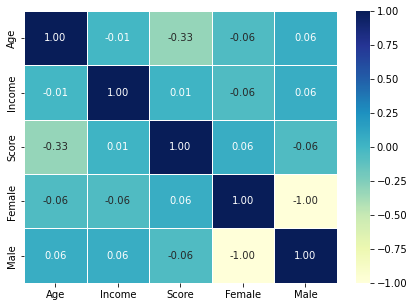

In [72]:
# Corelation Matrix
# Corelaiton Matrix
corr_matrix=dfR.corr()
fig, ax=plt.subplots(figsize=(7,5))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

##### Observations:
    There is not much interaction between input variables except the Age and Spending Score. Looks like there is a strong correlation between Age and Spending Score

In [73]:
# Descriptive Stastics
dfR.describe()

,Age,Income,Score,Female,Male
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.560000,0.440000
std,13.969007,26.264721,25.823522,0.497633,0.497633
min,18.000000,15.000000,1.000000,0.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000,0.000000
50%,36.000000,61.500000,50.000000,1.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000,1.000000


#### Observation:
    Age, Income and Score has different range, which may be a proble for distance based algorithm.
    In Next section we will apply feature scalling to handle this problem

### Feature Scaling

In [74]:
cols=['Age','Income','Score']

sc=RobustScaler()
sc= preprocessing.MinMaxScaler(feature_range =(0, 1)) 
dfR[cols]=sc.fit_transform(dfR[cols])

In [75]:
dfR.describe()

,Age,Income,Score,Female,Male
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.400962,0.373443,0.502041,0.560000,0.440000
std,0.268635,0.215285,0.263505,0.497633,0.497633
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.206731,0.217213,0.344388,0.000000,0.000000
50%,0.346154,0.381148,0.500000,1.000000,0.000000
75%,0.596154,0.516393,0.734694,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Observations: Now all the features has similar scale 

### CLUSTERING ALGORITHM

In [76]:
df3=dfR.copy()

In [77]:
## KMeans Clustering

km = KMeans(n_clusters=5, random_state=0) 

km_model=km.fit(df3)

predict=km_model.predict(df3)
df_km = df3.copy(deep=True)
df_km['Res'] = pd.Series(predict, index=df_km.index)

## Silhouette Score
print ('Silhouette Score: ', metrics.silhouette_score(df_km, df_km['Res']))
print('Intertia: ', km.inertia_)

Silhouette Score:  0.747795131772597
Intertia:  19.05733326166018


In [78]:
!pip install --upgrade kneed

In [83]:
from kneed import KneeLocator
kl = KneeLocator(range(2,20), wss, curve="convex", direction="decreasing")
print('The Knee located at figure:', kl.elbow)

kl = KneeLocator(range(2,20), scores, curve="convex", direction="increasing")
print('The Knee located at figure:', kl.elbow)

The Knee located at figure: 8
The Knee located at figure: 19


##### Find the optimal number of Clusters

In [84]:
%matplotlib inline
wss=[]
scores=[]
sil_scores=[]

Ks=range(2,20)

for i in Ks:
    km = KMeans(n_clusters=i, random_state=0)
    kmModel=km.fit(df3)
    predict=kmModel.predict(df3)
    
    wss_iter = kmModel.inertia_
    
    wss.append(wss_iter)
    sil_scores.append(metrics.silhouette_score(df_km, pd.Series(predict, index=df_km.index)))
    scores.append(kmModel.score(df3))
    

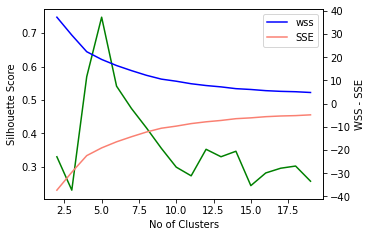

In [85]:
fig, ax1 = plt.subplots(figsize=(5, 3.5))
ax2 = ax1.twinx()

ax1.plot(Ks, sil_scores, c = 'green', label = "Silhouette Score")
ax2.plot(Ks, wss, c = 'blue', label = "wss");
ax2.plot(Ks, scores, c = 'salmon', label = "SSE");
ax2.set_ylabel('WSS - SSE')
ax1.set_ylabel('Silhouette Score')
ax1.set_xlabel("No of Clusters")

plt.legend()
plt.show()

##### Principal Component Analysis

In [86]:
pca = PCA(0.95)
principalComponents = pca.fit_transform(df3)
pca_df = pd.DataFrame(data = principalComponents)
pca_df=pca_df.add_prefix("column_")
pca_df.head()

,column_0,column_1,column_2,column_3
0,0.776310,-0.219917,0.321655,-0.413469
1,0.765939,-0.485640,-0.016386,-0.400614
2,-0.626852,0.079220,0.555394,-0.384380
3,-0.644593,-0.375302,-0.011047,-0.363076
4,-0.629942,-0.004985,0.158865,-0.355270


In [87]:
df4=pca_df.copy()
df2=pca_df.copy()
## KMeans Clustering

km = KMeans(n_clusters=11, random_state=0) 

km_model=km.fit(pca_df)

predict=km_model.predict(pca_df)
df_km = df4.copy(deep=True)
df_km['Res'] = pd.Series(predict, index=df_km.index)

## Silhouette Score
print ('Silhouette Score: ', metrics.silhouette_score(df_km, df_km['Res']))

Silhouette Score:  0.8055295244813533


In [88]:
%matplotlib inline
wss=[]
scores=[]
sil_scores=[]

Ks=range(2,50)

for i in Ks:
    km = KMeans(n_clusters=i, random_state=0)
    kmModel=km.fit(df2)
    predict=kmModel.predict(df2)
    
    wss_iter = kmModel.inertia_
    
    wss.append(wss_iter)
    sil_scores.append(metrics.silhouette_score(df_km, pd.Series(predict, index=df_km.index)))
    scores.append(kmModel.score(df2))

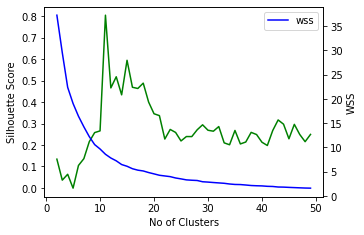

In [89]:
fig, ax1 = plt.subplots(figsize=(5, 3.5))
ax2 = ax1.twinx()

ax1.plot(Ks, sil_scores, c = 'green', label = "Silhouette Score")
ax2.plot(Ks, wss, c = 'blue', label = "wss");
ax2.set_ylabel('WSS')
ax1.set_ylabel('Silhouette Score')
ax1.set_xlabel("No of Clusters")

plt.legend()
plt.show()

In [90]:
col=df_km.columns
df_km

,column_0,column_1,column_2,column_3,Res
0,0.776310,-0.219917,0.321655,-0.413469,4
1,0.765939,-0.485640,-0.016386,-0.400614,4
2,-0.626852,0.079220,0.555394,-0.384380,10
3,-0.644593,-0.375302,-0.011047,-0.363076,0
4,-0.629942,-0.004985,0.158865,-0.355270,10
...,...,...,...,...,...
195,-0.622432,-0.243949,-0.134231,0.501469,9
196,-0.602085,0.251138,0.115675,0.548875,7
197,0.791093,-0.306840,-0.056290,0.517786,6
198,0.808090,0.082360,0.364597,0.593602,5


<AxesSubplot:xlabel='column_0', ylabel='column_1'>

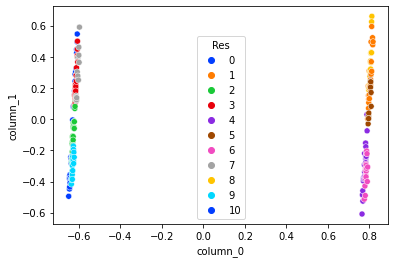

In [91]:
sns.scatterplot(x='column_0',y='column_1', data=df_km, hue="Res", 
                                palette ="bright")

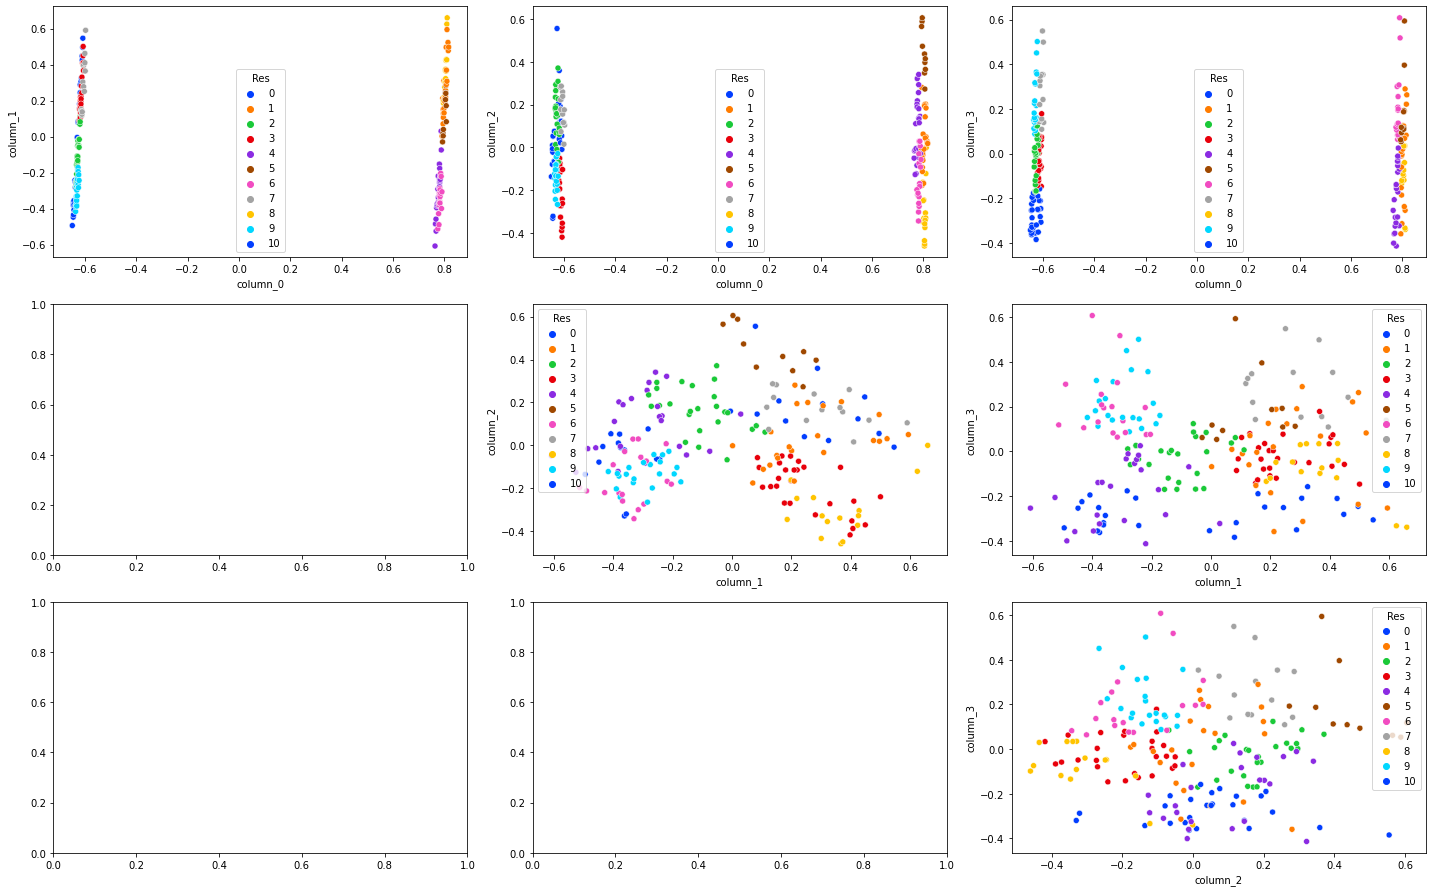

In [92]:
## Visualize the Clusters
col=df_km.columns
n_rows=len(col)-1
n_cols=len(col)
fig, ax=plt.subplots(n_rows-1,n_cols-2,figsize=(len(col)*4,len(col)*2.5))

for i in range (1, n_rows):
    for j in range (i+1,n_cols):
        if not col[i] == col[j]:
                ax_i=ax[i-1,j-2]
                sns.scatterplot(x=col[i-1],y=col[j-1], data=df_km, hue="Res", 
                                palette ="bright",ax=ax_i)
plt.tight_layout()

In [96]:
norm = MinMaxScaler()

X_Hierar = norm.fit_transform(df3)
X_Hierar = pd.DataFrame(X_Hierar, columns=df3.columns)
print(X_Hierar.head(5))

        Age    Income     Score  Female  Male
0  0.019231  0.000000  0.387755     0.0   1.0
1  0.057692  0.000000  0.816327     0.0   1.0
2  0.038462  0.008197  0.051020     1.0   0.0
3  0.096154  0.008197  0.775510     1.0   0.0
4  0.250000  0.016393  0.397959     1.0   0.0


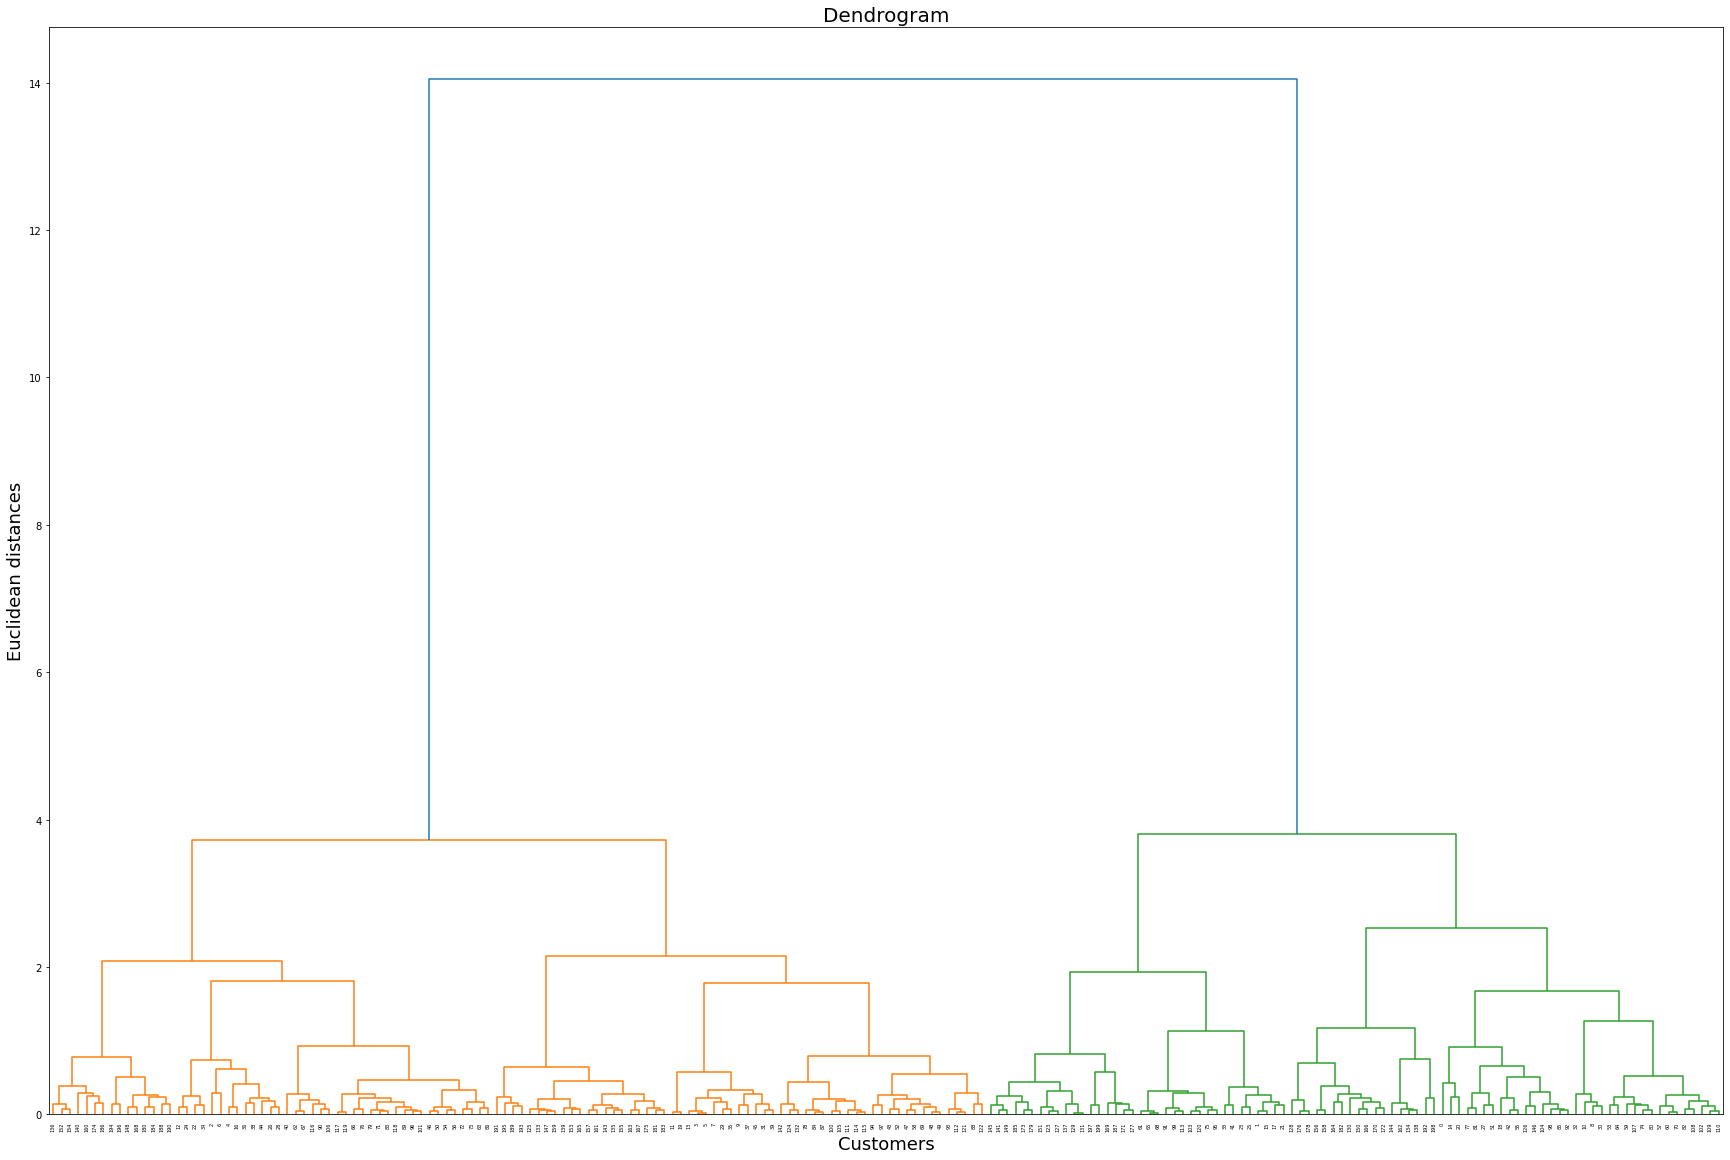

In [100]:
## Build dendrogram to find out the optimal number of clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30,20))
dendrogram = shc.dendrogram(shc.linkage(X_Hierar, method = 'ward'))
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Customers', fontsize=18)
plt.ylabel('Euclidean distances', fontsize=18)
plt.show()